<a href="https://colab.research.google.com/github/mithin120/713-Excelr/blob/main/toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [4]:
df_cleaned = df.copy()
df_cleaned.drop(columns=["Id", "Model"], inplace=True)
missing_values = df_cleaned.isnull().sum()

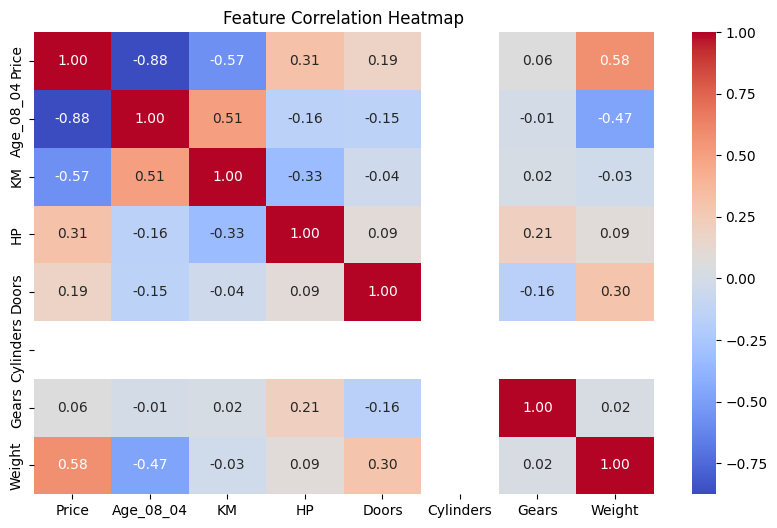

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df_cleaned.drop(columns=["Price"])
y = df_cleaned["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae, rmse, r2

(998.5148131288653, 1405.7346756435134, 0.8518982799282362)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import numpy as np

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df = df.drop(columns=["Id"])

X = df.drop(columns=["Price"])
y = df["Price"]

categorical_features = ["Model"]
numeric_features = ["Age_08_04", "KM", "HP", "Doors", "Cylinders", "Gears", "Weight"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

def predict_car_price():
    model_input = input("Enter Model: ")
    age = int(input("Enter Age of Car: "))
    km = int(input("Enter Kilometers Driven: "))
    hp = int(input("Enter Horsepower: "))
    doors = int(input("Enter Number of Doors: "))
    cylinders = int(input("Enter Number of Cylinders: "))
    gears = int(input("Enter Number of Gears: "))
    weight = int(input("Enter Weight of Car: "))

    input_data = pd.DataFrame([[model_input, age, km, hp, doors, cylinders, gears, weight]],
                              columns=categorical_features + numeric_features)

    predicted_price = model.predict(input_data)[0]
    print(f"Predicted Car Price: {predicted_price:.2f}")

predict_car_price()

Saving Toyoto_Corrola.csv to Toyoto_Corrola (3).csv
MAE: 894.912538973956
MSE: 1699666.0224313424
R² Score: 0.8726153848088782
Enter Model: TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors
Enter Age of Car: 23
Enter Kilometers Driven: 46986
Enter Horsepower: 90
Enter Number of Doors: 3
Enter Number of Cylinders: 4
Enter Number of Gears: 5
Enter Weight of Car: 1165
Predicted Car Price: 14532.42
